# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
HTTP_STATUS_OK = 200
NUM_POINTS = 1500   
BASE_URL = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        ### Check the map data with city_url, I didn't use the .get because some data is in side dict and then list
        ### when extractring the data, if only use the first text value data will show 0, because the value is inside other dict or list.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | cabedelo
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | pedra branca
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | san felipe
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | giado
Processing Record 15 of Set 1 | porto novo
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | polavaram
Ci

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,19.08,72,88,9.97,AU,1717172415
1,port-aux-francais,-49.3500,70.2167,6.39,95,100,15.51,TF,1717172412
2,souillac,-20.5167,57.5167,24.21,69,40,5.14,MU,1717172510
3,cabedelo,-6.9811,-34.8339,29.37,72,58,6.77,BR,1717172510
4,vorgashor,67.5833,63.9500,-2.33,87,100,5.54,RU,1717172510


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,19.08,72,88,9.97,AU,1717172415
1,port-aux-francais,-49.3500,70.2167,6.39,95,100,15.51,TF,1717172412
2,souillac,-20.5167,57.5167,24.21,69,40,5.14,MU,1717172510
3,cabedelo,-6.9811,-34.8339,29.37,72,58,6.77,BR,1717172510
4,vorgashor,67.5833,63.9500,-2.33,87,100,5.54,RU,1717172510


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

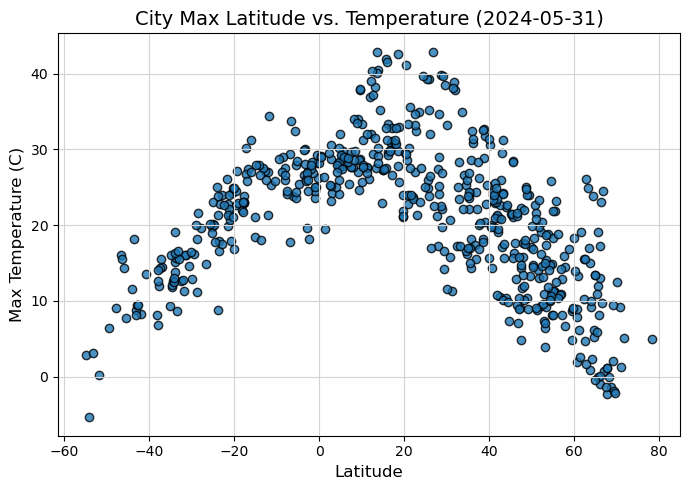

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# in-text citation for DateFormatter, Xpert Learning
# Format date
date = datetime.now()
date = date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (C)", fontsize=12)
plt.title(f"City Max Latitude vs. Temperature ({date})", fontsize=14)
plt.grid(color="lightgrey") 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

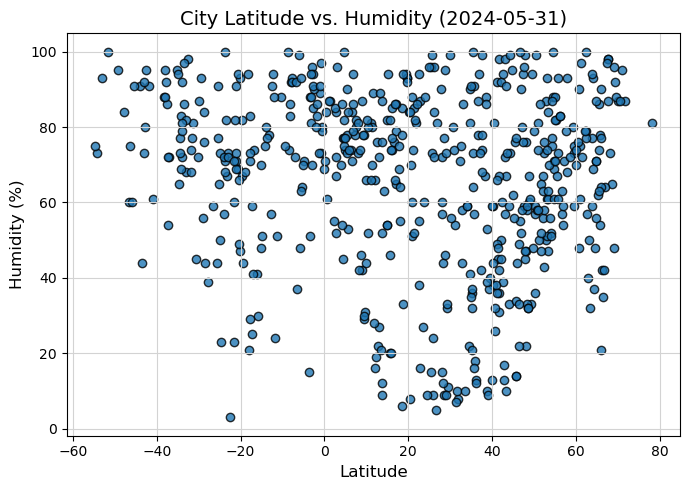

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# in-text citation for DateFormatter, Xpert Learning
# Format date
date = datetime.now()
date = date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.title(f"City Latitude vs. Humidity ({date})", fontsize=14)
plt.grid(color="lightgrey") 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

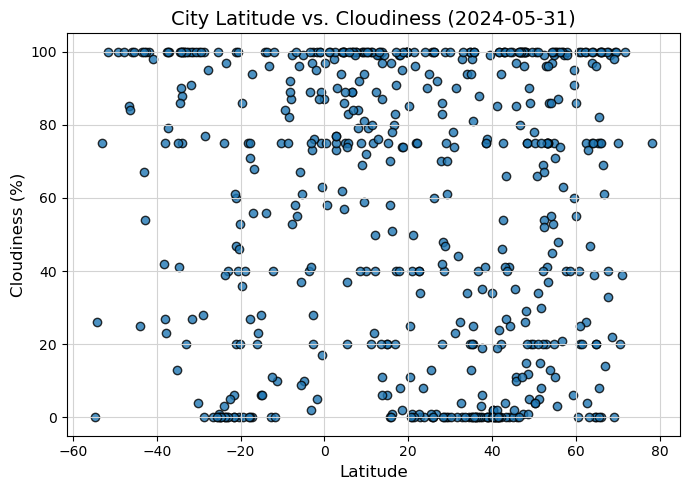

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# in-text citation for DateFormatter, Xpert Learning
# Format date
date = datetime.now()
date = date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.title(f"City Latitude vs. Cloudiness ({date})", fontsize=14)
plt.grid(color="lightgrey") 
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

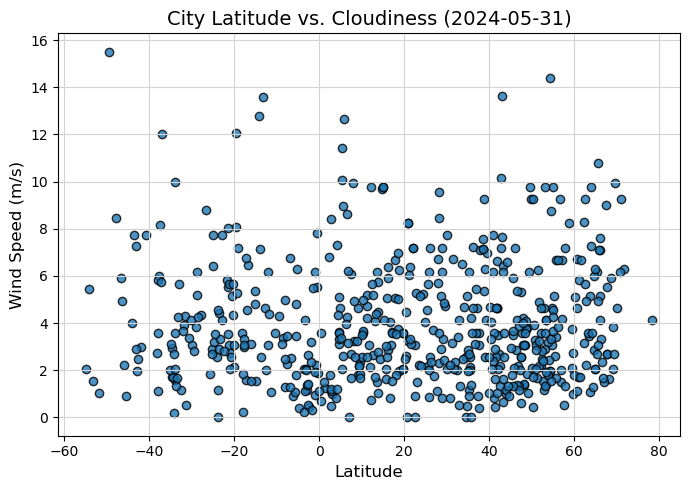

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# in-text citation for DateFormatter, Xpert Learning
# Format date
date = datetime.now()
date = date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.title(f"City Latitude vs. Cloudiness ({date})", fontsize=14)
plt.grid(color="lightgrey") 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def doRegression(x_values, y_values, x_title, y_title, annotation_position):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(7, 5))
    
    #Plot values
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "-r")
    
    plt.xlabel(x_title, fontsize=12)
    plt.ylabel(y_title, fontsize=12)
    plt.title(f"{x_title} vs {y_title}")
    
    plt.annotate(line_eq, annotation_position, fontsize=15, color="red")
    
    print(f'The r-value is {rvalue}')
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,vorgashor,67.5833,63.9500,-2.33,87,100,5.54,RU,1717172510
7,san felipe,10.3399,-68.7425,31.26,52,79,3.58,VE,1717172511
10,ribeira grande,38.5167,-28.7000,18.22,88,75,7.15,PT,1717172413
12,giado,31.9582,12.0203,37.84,8,44,2.35,LY,1717172511
13,porto novo,6.4965,2.6036,28.90,71,89,4.24,BJ,1717172511


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,19.08,72,88,9.97,AU,1717172415
1,port-aux-francais,-49.3500,70.2167,6.39,95,100,15.51,TF,1717172412
2,souillac,-20.5167,57.5167,24.21,69,40,5.14,MU,1717172510
3,cabedelo,-6.9811,-34.8339,29.37,72,58,6.77,BR,1717172510
5,pedra branca,-5.4542,-39.7172,27.95,64,61,3.44,BR,1717172510


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.7590305897189101


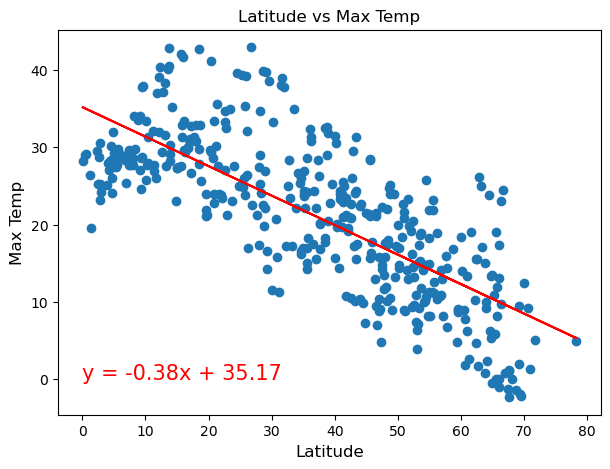

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Max Temp", (0,0))

The r-value is 0.8555540062026911


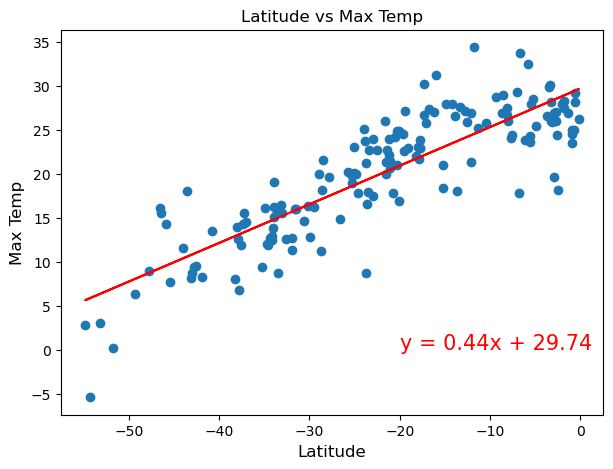

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Max Temp", (-20,0))

**Discussion about the linear relationship:** 

Northern Hemisphere: the linear displays a negative relationship between the temperature and latitude, when we move away from the equator, the max temperature decreases.
Southern Hemisphere: the linear displays a sligtly is positive relationship between the temperature and latitude, when we move closer to the equator, the max temperature generally increases.

Conclusion: at higher latitudes (closer to the poles), temperatures are colder and at lower latitudes (closer to the equator), temperatures will be warmer.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.03786326039183906


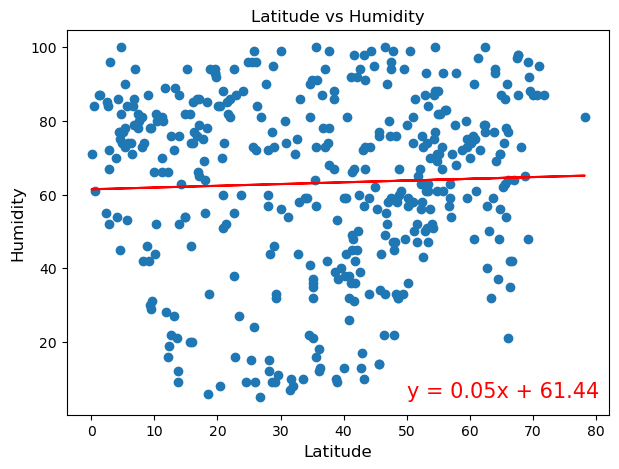

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (50,5))

The r-value is 0.8555540062026911


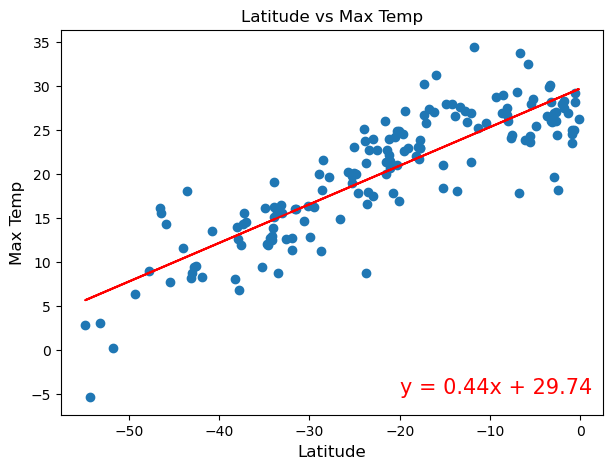

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Max Temp", (-20,-5))

**Discussion about the linear relationship:** 

Northern Hemisphere: the linear displays a minimally negative relationship between the humidity and latitude, there doesn't appear to be a strong coorelation between humidity and latitude.

Southern Hemisphere: the linear displays a slightly positive relationship between the humidity and latitude, the closer to the equator the humidity generally increase.

Conclusi:  onFor the cities closer to the equator the humidity increasr.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.11863949663057036


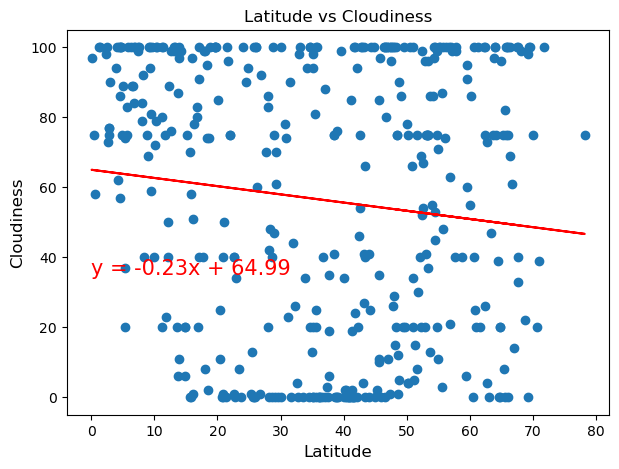

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (0,35))

The r-value is -0.10316250123459676


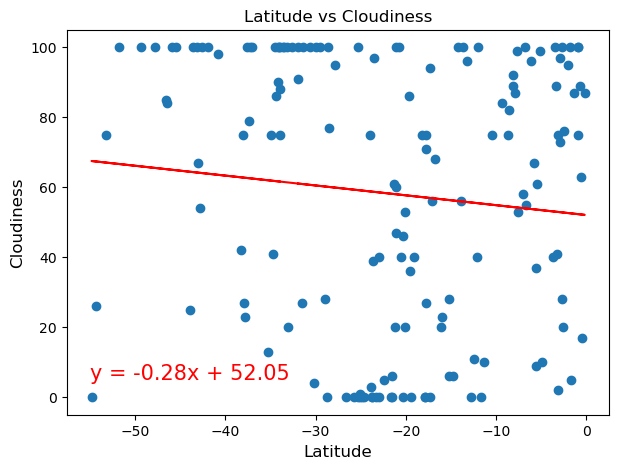

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (-55,5))

**Discussion about the linear relationship:** 

For both Hemispheres: As the linear display shows there does not appear to be a coorelation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.048311821698564184


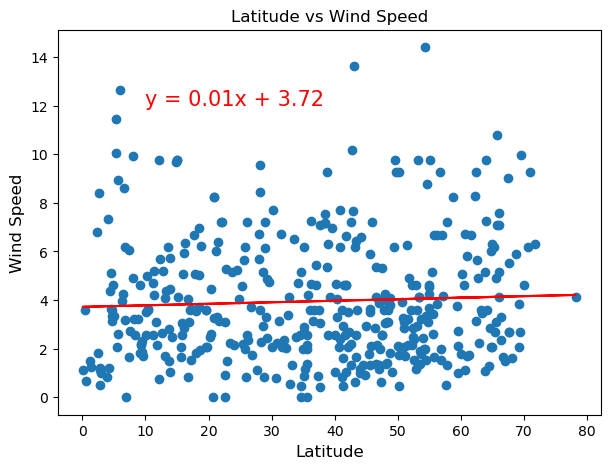

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (10,12))

The r-value is -0.17760285527209113


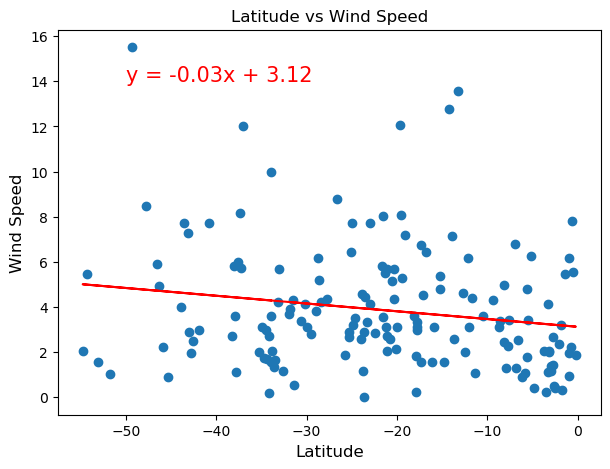

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (-50,14))

**Discussion about the linear relationship:** 

For both Hemispheres: As the linear display shows there does not appear to be a coorelation between latitude and wind speed.